In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

In [3]:
df=pd.read_csv('Instagram data.csv',encoding = 'latin1')

In [4]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [5]:
df.tail()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
118,36919,13473,4176,16444,2547,653,5,26,443,611,228,175 Python Projects with Source Code solved an...,#python #pythonprogramming #pythonprojects #py...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [9]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [10]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [12]:
df.duplicated().sum()

17

In [13]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(102, 13)

In [19]:
df.dtypes

Impressions        int64
From Home          int64
From Hashtags      int64
From Explore       int64
From Other         int64
Saves              int64
Comments           int64
Shares             int64
Likes              int64
Profile Visits     int64
Follows            int64
Caption           object
Hashtags          object
dtype: object

# Exploratory Data Analysis

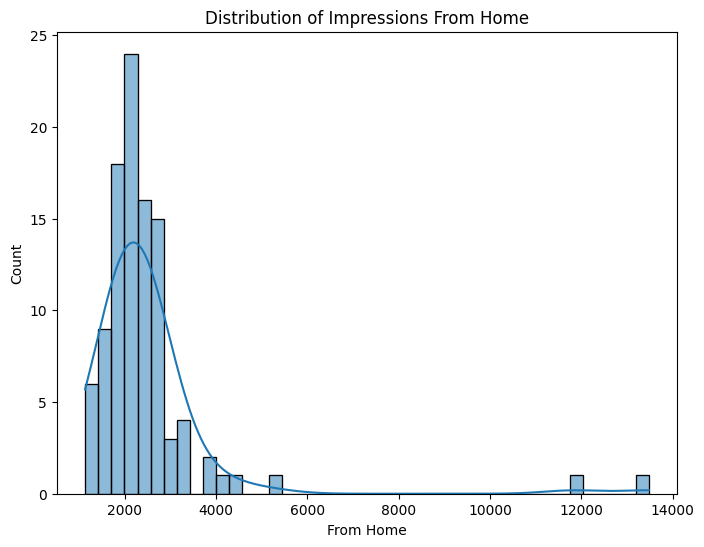

In [30]:
plt.figure(figsize=(8,6))
sns.histplot(df['From Home'],kde=True)
plt.title("Distribution of Impressions From Home")
plt.show()

The impressions I get from the home section on Instagram shows how much my posts reach my followers. Looking at the impressions from home, I can say it’s hard to reach all my followers daily.

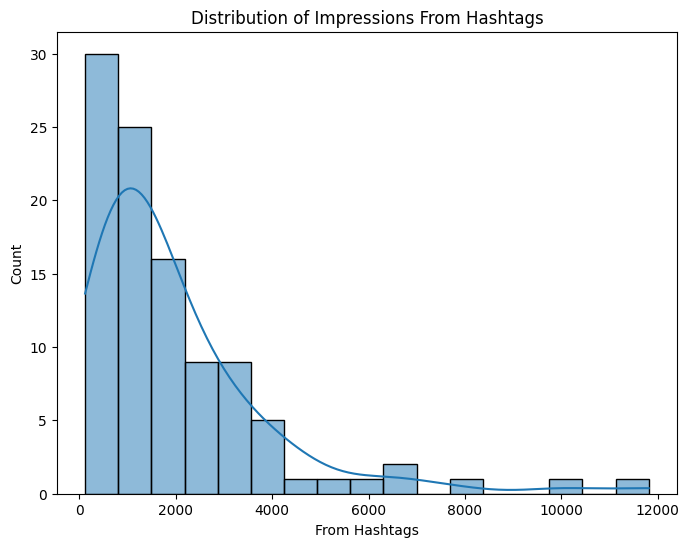

In [31]:
plt.figure(figsize=(8,6))
sns.histplot(df['From Hashtags'],kde=True)
plt.title("Distribution of Impressions From Hashtags")
plt.show()

Looking at hashtag impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags.

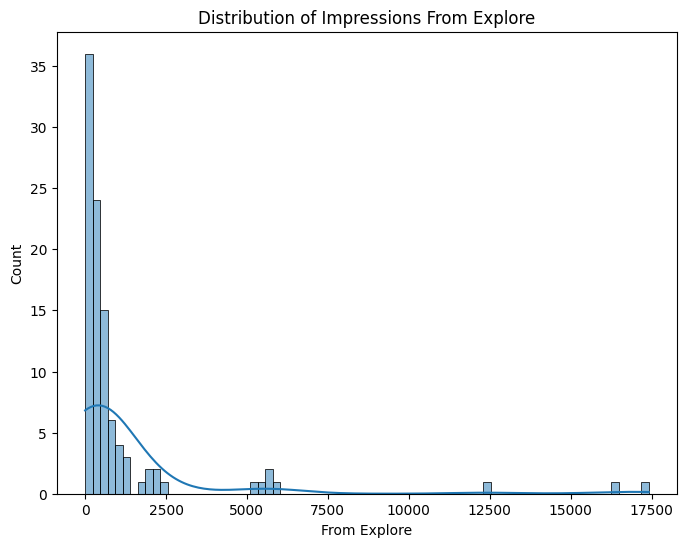

In [32]:
plt.figure(figsize=(8,6))
sns.histplot(df['From Explore'],kde=True)
plt.title("Distribution of Impressions From Explore")
plt.show()

From this graph we can say that Instagram does not recommend our posts much to the users.

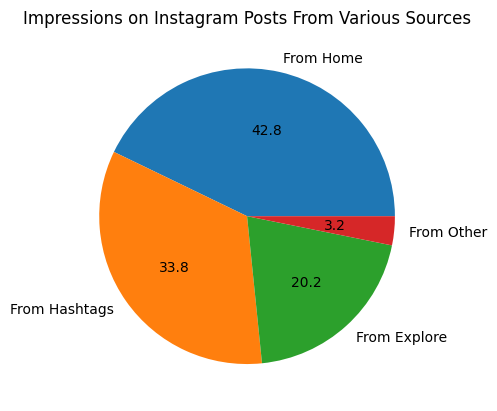

In [39]:
home=df['From Home'].sum()
hashtags=df['From Hashtags'].sum()
explore=df['From Explore'].sum()
others=df['From Other'].sum()

labels=['From Home','From Hashtags','From Explore','From Other']
values=[home,hashtags,explore,others]

plt.pie(values,labels=labels,autopct='%1.1f')
plt.title('Impressions on Instagram Posts From Various Sources')
plt.show()

So the above pie plot shows that almost 43 per cent of the reach is from my followers, 33.8 per cent is from hashtags, 20.2 per cent is from the explore section, and 3.2 per cent is from other sources.

# Let’s create a wordcloud of the caption and hashtags column to look at the most used words in the caption of my Instagram posts.

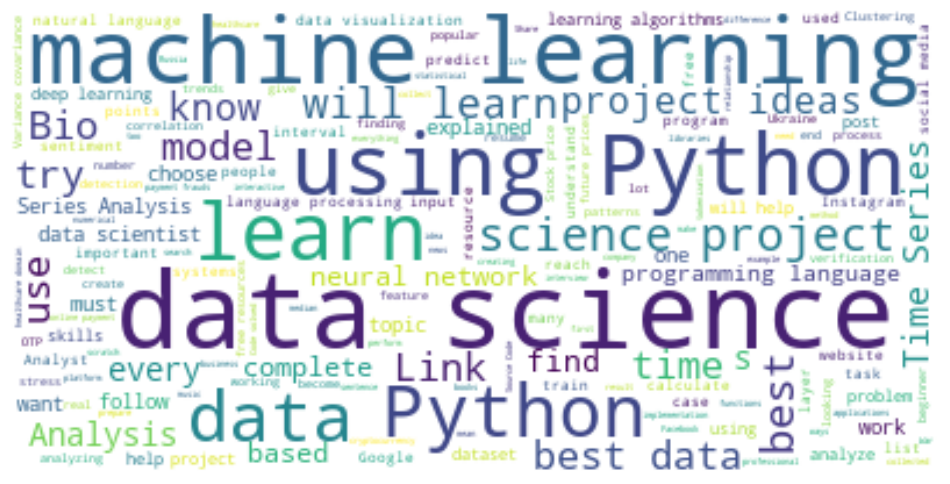

In [56]:
text=" ".join(i for i in df.Caption)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


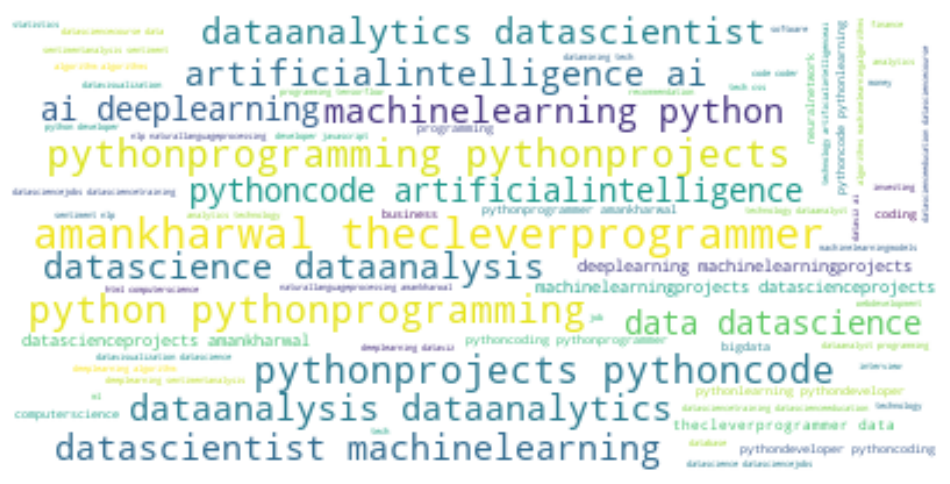

In [62]:
text=" ".join(i for i in df.Hashtags)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Analyzing Relationships

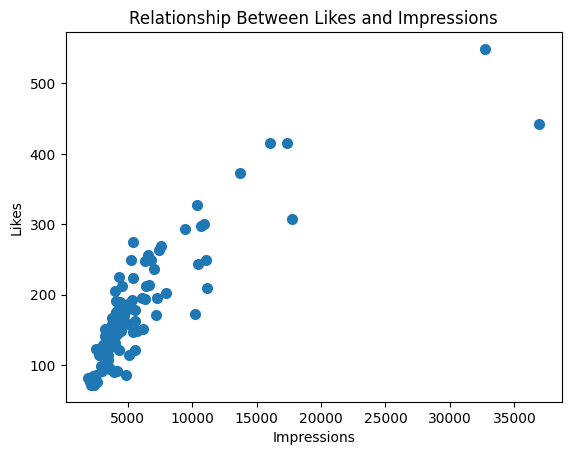

In [70]:
plt.scatter(data=df,x='Impressions',y='Likes')
plt.title( "Relationship Between Likes and Impressions")
plt.xlabel('Impressions')
plt.ylabel('Likes')
plt.show()

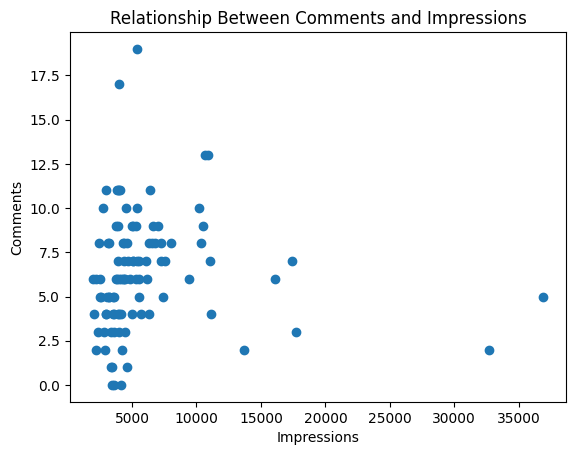

In [72]:
plt.scatter(data=df,x='Impressions',y='Comments')
plt.title( "Relationship Between Comments and Impressions")
plt.xlabel('Impressions')
plt.ylabel('Comments')
plt.show()

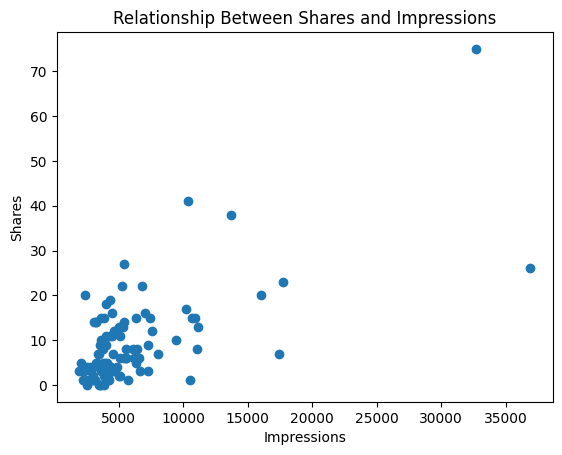

In [73]:
plt.scatter(data=df,x='Impressions',y='Shares')
plt.title( "Relationship Between Shares and Impressions")
plt.xlabel('Impressions')
plt.ylabel('Shares')
plt.show()

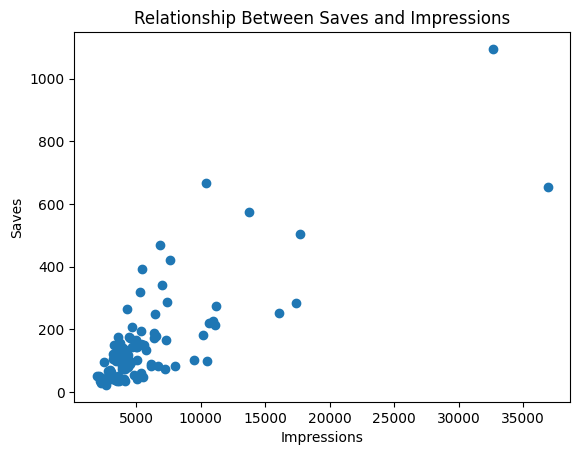

In [97]:
plt.scatter(data=df,x='Impressions',y='Saves')
plt.title( "Relationship Between Saves and Impressions")
plt.xlabel('Impressions')
plt.ylabel('Saves')
plt.show()

 Now let’s have a look at the correlation of all the columns with the Impressions column.

In [83]:
df['Impressions']=df['Impressions'].astype('float')
df['From Home']=df['From Home'].astype('float')
df['From Hashtags']=df['From Hashtags'].astype('float')
df['From Explore']=df['From Explore'].astype('float')
df['From Other']=df['From Other'].astype('float')
df['Saves']=df['Saves'].astype('float')
df['Shares']=df['Shares'].astype('float')
df['Comments']=df['Comments'].astype('float')
df['Likes']=df['Likes'].astype('float')
df['Profile Visits']=df['Profile Visits'].astype('float')
df['Follows']=df['Follows'].astype('float')

In [86]:
df.dtypes

Impressions       float64
From Home         float64
From Hashtags     float64
From Explore      float64
From Other        float64
Saves             float64
Comments          float64
Shares            float64
Likes             float64
Profile Visits    float64
Follows           float64
Caption            object
Hashtags           object
dtype: object

# Analyzing conversion rate

Conversation rate means how many followers you are getting from the number of profile visits from a post. 
Formula=(Follows/Profile visit)*100

In [87]:
conversion_rate=(df['Follows'].sum()/df['Profile Visits'].sum())*100
print(conversion_rate)

41.75035868005739


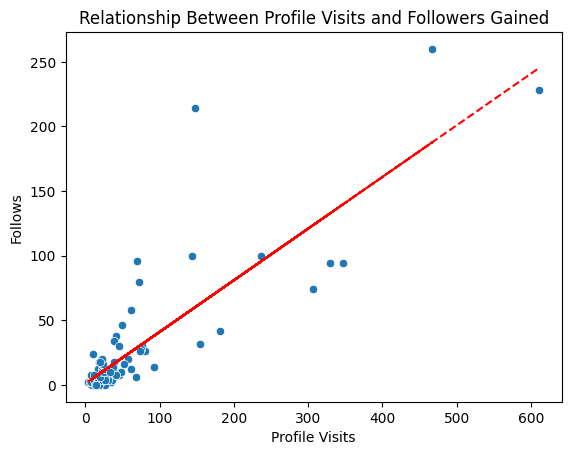

In [95]:
sns.scatterplot(data=df,x='Profile Visits',y='Follows')
plt.title("Relationship Between Profile Visits and Followers Gained")
x=df['Profile Visits']
y=df['Follows']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()
